In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"\nX_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


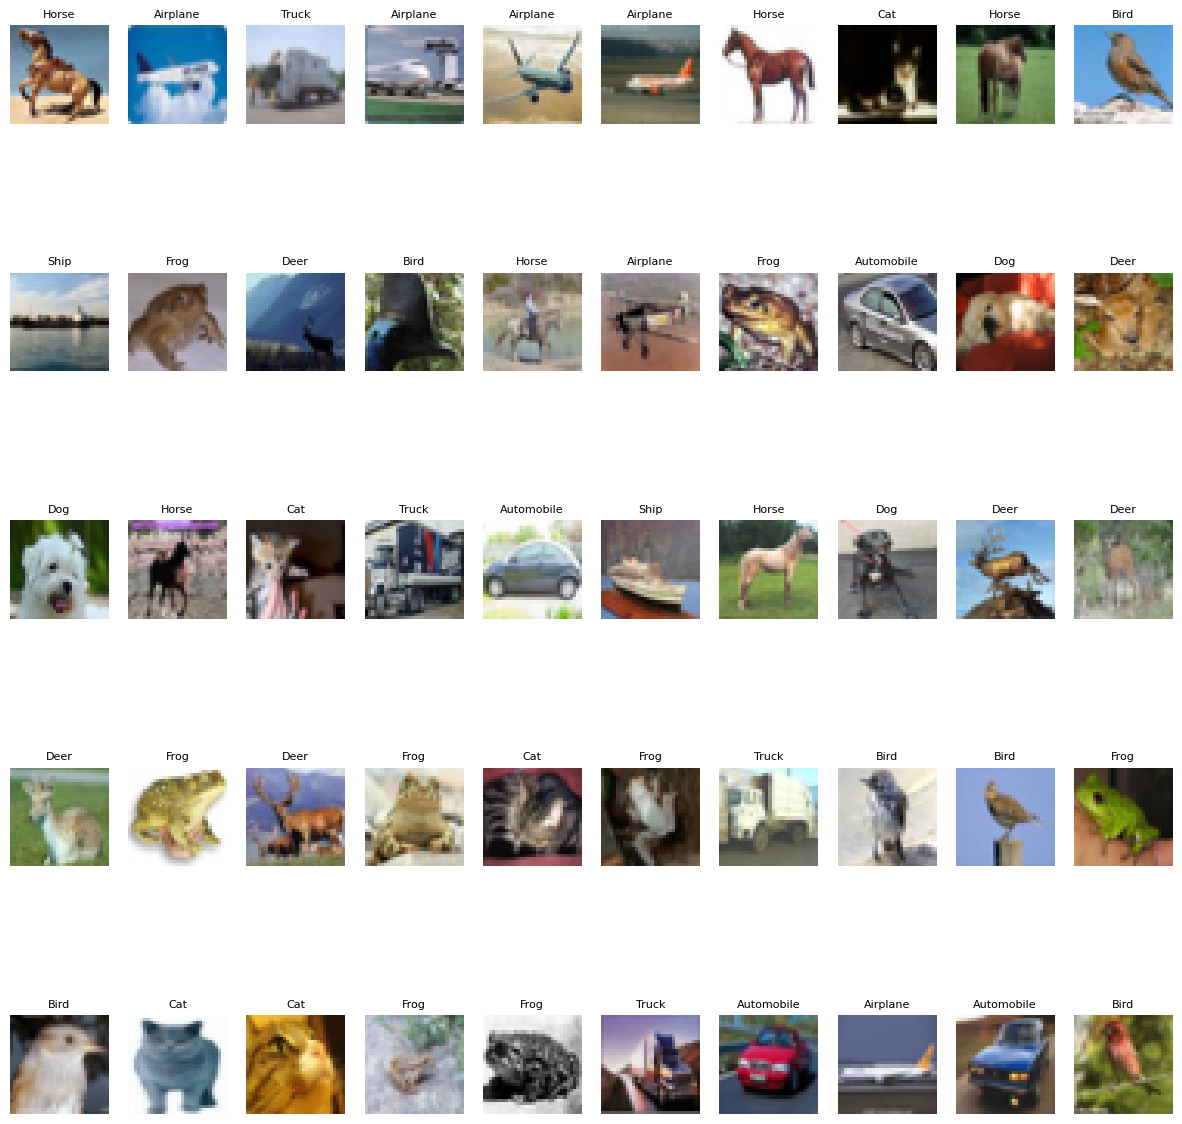

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define CIFAR-10 labels
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot grid of images
fig, axes = plt.subplots(5, 10, figsize=(15, 15))
axes = axes.ravel()  # Flatten the grid into 1D array

for i in range(50):  # Display 50 random images
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(labels[y_train[index][0]], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

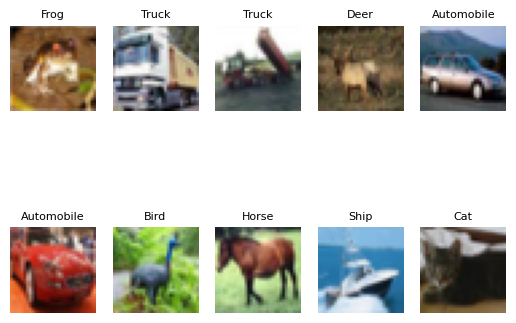

In [3]:
labels2 = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
           'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display first 10 images
for i in range(10):  # Loop 10 times to display 10 images
  plt.subplot(2, 5, i + 1)  # Create a 2x5 subplot grid
  plt.imshow(X_train[i], cmap='gray')  # Display image with grayscale
  plt.title(labels2[y_train[i][0]], fontsize=8)  # Set title using label
  plt.axis('off')  # Turn off axis labels and ticks

plt.show()  # Display the plot

In [4]:
# Normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
from tensorflow.keras.utils import to_categorical

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [37]:
import numpy as np

def check_one_hot_encoding(y_cat):
  for row in y_cat:
    if np.sum(row) != 1:
      return False
  return True

# Example usage:
if check_one_hot_encoding(y_cat_train):
  print("y_cat_train is correctly one-hot encoded.")
else:
  print("y_cat_train has issues in one-hot encoding.")

y_cat_train is correctly one-hot encoded.


In [38]:
print(y_cat_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Define constants
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
POOL_SIZE = (2, 2)
DROPOUT_RATE = 0.25
NUM_CLASSES = 10

# Initialize model
model = Sequential()

# Block 1
model.add(Conv2D(32, kernel_size=KERNEL_SIZE, activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Dropout(DROPOUT_RATE))

# Block 2
model.add(Conv2D(64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Dropout(DROPOUT_RATE))

# Block 3
model.add(Conv2D(128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SIZE))
model.add(Dropout(DROPOUT_RATE))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(NUM_CLASSES, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Compile the model
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=METRICS)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [10]:
# Data augmentation: Adds random transformations to images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
data_generator = ImageDataGenerator(
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    horizontal_flip=True    # Random horizontal flip
)

# Prepare augmented training data generator
train_generator = data_generator.flow(X_train, y_cat_train, batch_size=batch_size)
steps_per_epoch = X_train.shape[0] // batch_size



In [11]:
# Train the model (50 epochs and patience 7)
epochs = 50

training_history  = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(X_test, y_cat_test),
    callbacks=[early_stop]  # Add early stopping
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.3285 - loss: 1.8758 - precision: 0.5080 - recall: 0.1130 - val_accuracy: 0.5371 - val_loss: 1.2907 - val_precision: 0.6605 - val_recall: 0.4164
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4375 - loss: 1.4953 - precision: 0.6250 - recall: 0.3125

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.4375 - loss: 1.4953 - precision: 0.6250 - recall: 0.3125 - val_accuracy: 0.5427 - val_loss: 1.2837 - val_precision: 0.6635 - val_recall: 0.4203
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.5449 - loss: 1.2716 - precision: 0.7152 - recall: 0.3716 - val_accuracy: 0.6031 - val_loss: 1.1731 - val_precision: 0.7093 - val_recall: 0.5151
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.5312 - loss: 1.2367 - precision: 0.6500 - recall: 0.4062 - val_accuracy: 0.6073 - val_loss: 1.1566 - val_precision: 0.7125 - val_recall: 0.5153
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6279 - loss: 1.0673 - precision: 0.7652 - recall: 0.4917 - val_accuracy: 0.6581 - val_loss: 1.0072 - val_precision: 0.7333 - val_recall: 0.5845
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.6250 - loss: 0.8235 - precision: 0.8500 - recall: 0.5312 - val_accuracy: 0.6599 - val

In [12]:
# Evaluate the model: 50 epochs
test_accuracy = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {test_accuracy[1] * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8506 - loss: 0.4603 - precision: 0.8928 - recall: 0.8081
Test Accuracy : 84.93%


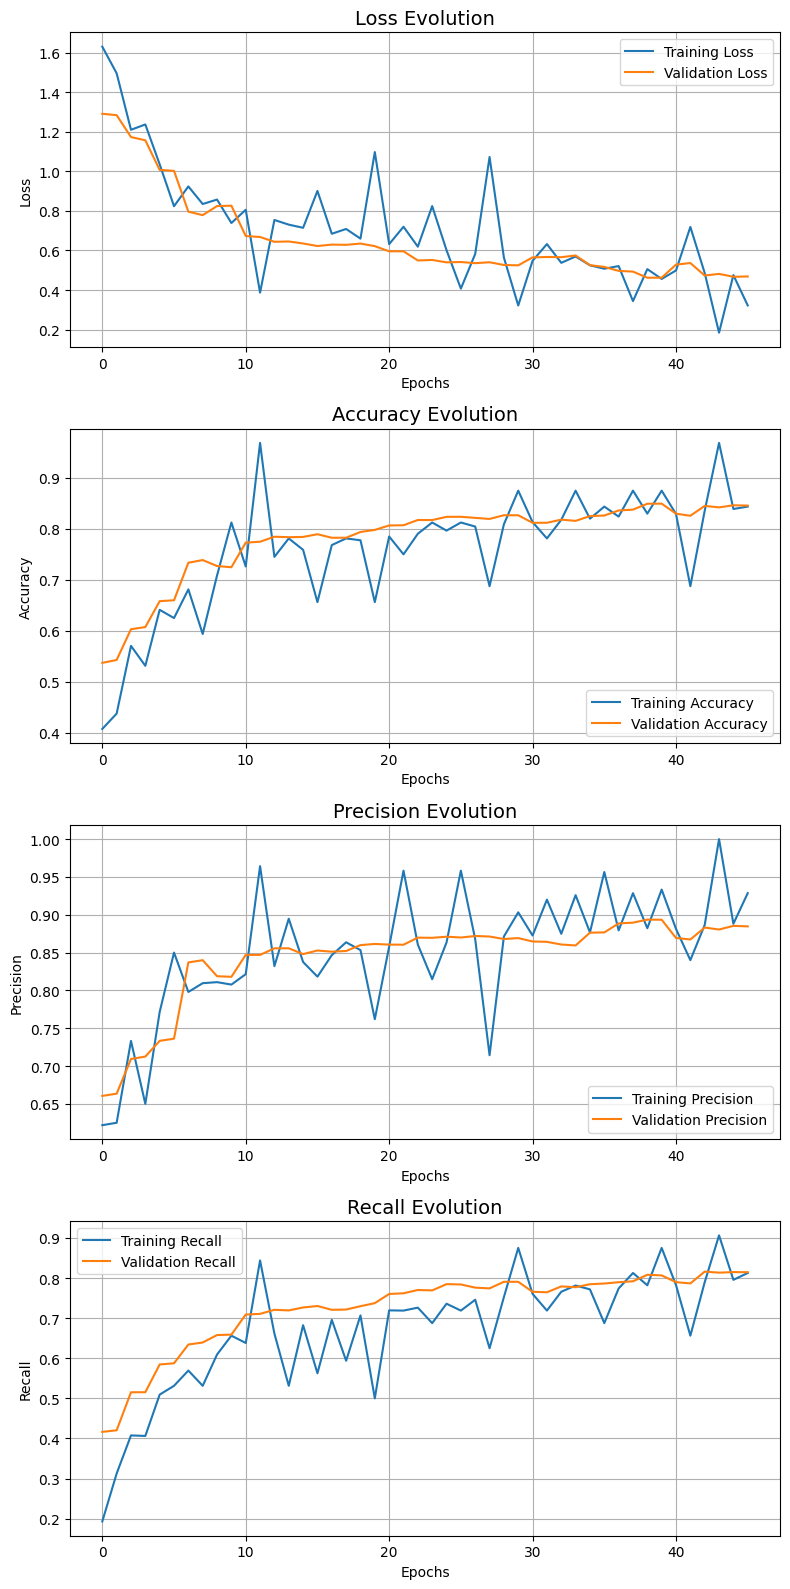

In [14]:
# Define the metrics to visualize
metrics = ['loss', 'accuracy', 'precision', 'recall']

# Create subplots dynamically based on the number of metrics
plt.figure(figsize=(8, len(metrics) * 4))  # Adjust height dynamically

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i + 1)  # Create a subplot for each metric
    plt.plot(training_history.history[metric], label=f'Training {metric.capitalize()}')
    plt.plot(training_history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    plt.title(f'{metric.capitalize()} Evolution', fontsize=14)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


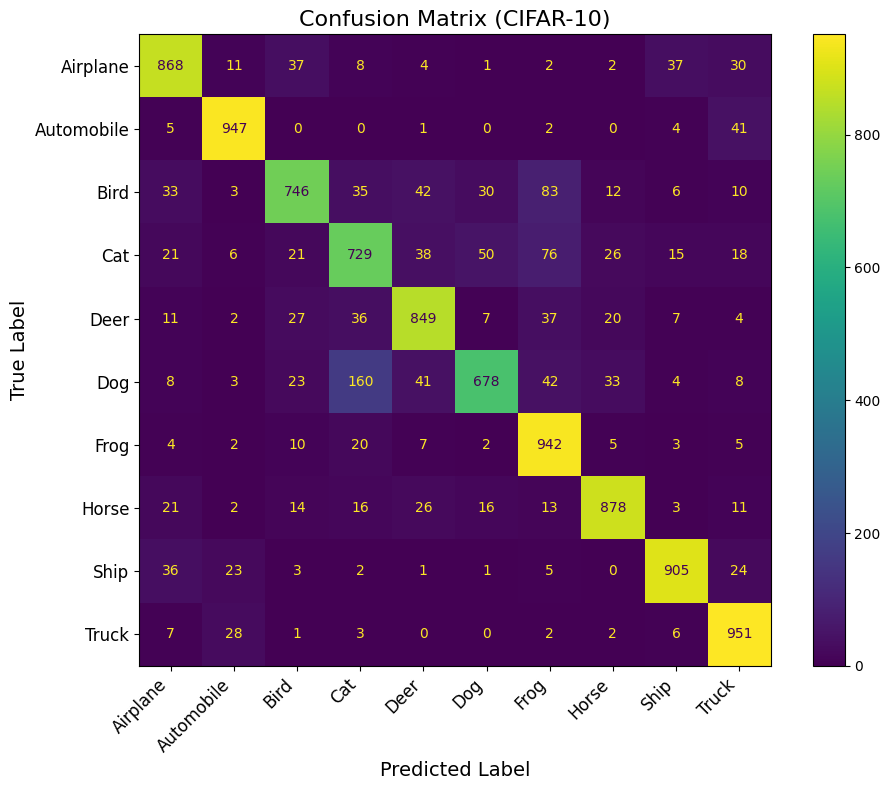

In [16]:
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define class labels (ensure this matches the CIFAR-10 dataset labels)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Increased height for better readability

# Plot the confusion matrix with a custom colormap and title
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap='viridis', colorbar=True)  # Adjust colormap to 'viridis' for clarity

# Set detailed plot labels and title
ax.set_title('Confusion Matrix (CIFAR-10)', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(labels, fontsize=12)

# Add grid for visual clarity
ax.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
print("Classification Report for CNN:")
print(classification_report(y_test, y_pred_classes, digits=4))


Classification Report for CNN:
              precision    recall  f1-score   support

           0     0.8560    0.8680    0.8620      1000
           1     0.9221    0.9470    0.9344      1000
           2     0.8458    0.7460    0.7928      1000
           3     0.7225    0.7290    0.7257      1000
           4     0.8414    0.8490    0.8452      1000
           5     0.8637    0.6780    0.7597      1000
           6     0.7824    0.9420    0.8548      1000
           7     0.8978    0.8780    0.8878      1000
           8     0.9141    0.9050    0.9095      1000
           9     0.8630    0.9510    0.9049      1000

    accuracy                         0.8493     10000
   macro avg     0.8509    0.8493    0.8477     10000
weighted avg     0.8509    0.8493    0.8477     10000



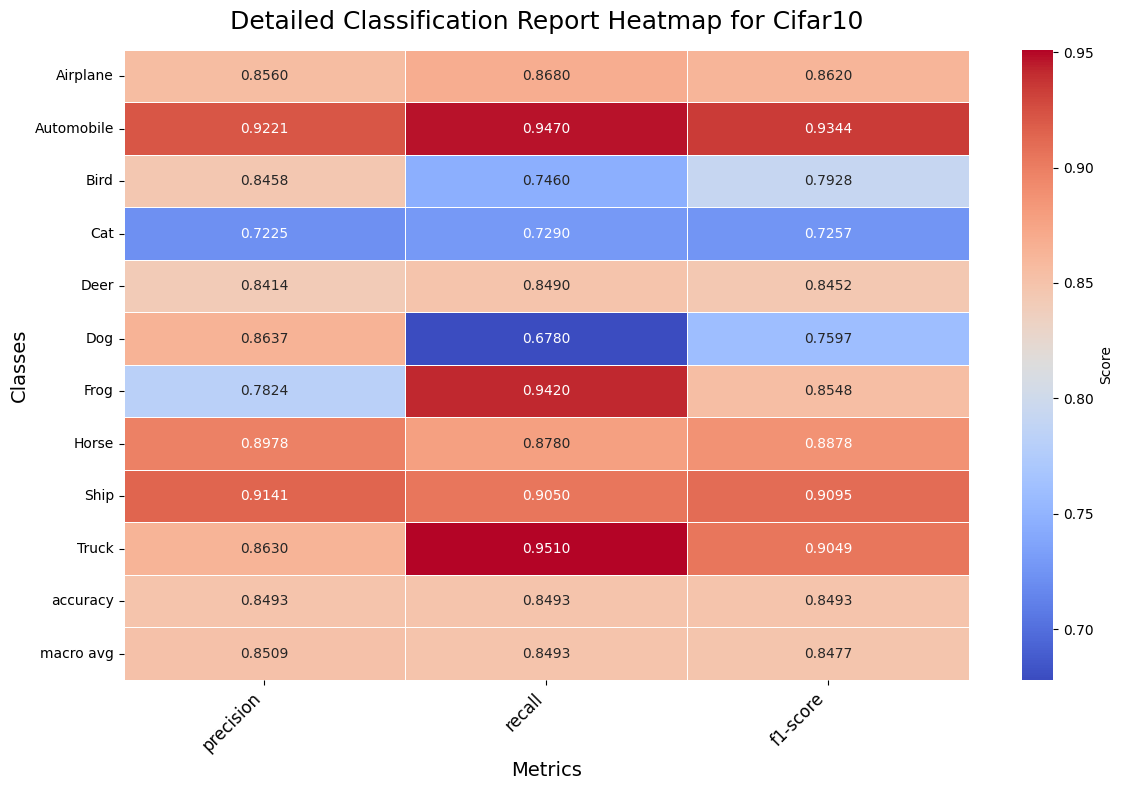

In [19]:
import seaborn as sns
import pandas as pd

# Generate classification report
report_cnn = classification_report(y_test, y_pred_classes, target_names=labels, digits=4, output_dict=True)

# Convert report to a DataFrame for better visualization
report_df_cnn = pd.DataFrame(report_cnn).transpose()

# Create a heatmap for the classification report
plt.figure(figsize=(12, 8))  # Adjusted for better readability
sns.heatmap(
    report_df_cnn.iloc[:-1, :-1],  # Exclude the last row (support)
    annot=True,
    cmap='coolwarm',  # Changed to 'coolwarm' for better contrast
    fmt='.4f',
    linewidths=0.5,
    cbar_kws={'label': 'Score'}  # Add colorbar label
)

plt.title('Detailed Classification Report Heatmap for Cifar10', fontsize=18, pad=15)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


### Test on images


Image True Label: 4 (Class: Deer)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The model predicts that image is 4 (Class: Deer)


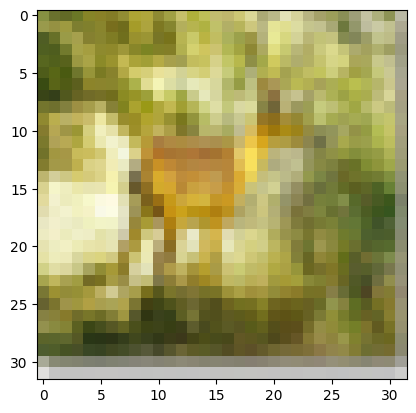

In [43]:
# Select an image from the test dataset
image1 = X_test[500]
plt.imshow(image1)

true_label = np.argmax(y_cat_test[500])
print(f"Image True Label: {true_label} (Class: {labels[true_label]})")
pred_100 = np.argmax(model.predict(image1.reshape(1, 32, 32, 3)))
print(f"The model predicts that image is {pred_100} (Class: {labels[pred_100]})")


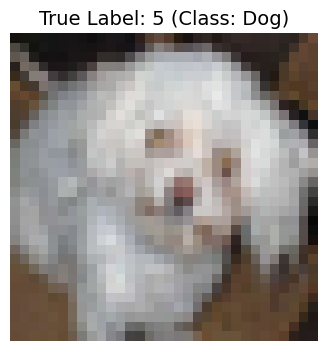

In [41]:
test_image_index = 1000
test_image = X_test[test_image_index]
true_label = np.argmax(y_cat_test[test_image_index])

plt.figure(figsize=(4, 4))
plt.imshow(test_image)
plt.title(f"True Label: {true_label} (Class: {labels[true_label]})", fontsize=14)
plt.axis('off')
plt.show()

In [42]:
processed_image = test_image.reshape(1, 32, 32, 3)

prediction = model.predict(processed_image)
predicted_label = np.argmax(prediction, axis=1)[0]
print(f"True Label: {true_label} (Class: {labels[true_label]})")
print(f"Predicted Label: {predicted_label} (Class: {labels[predicted_label]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
True Label: 5 (Class: Dog)
Predicted Label: 5 (Class: Dog)


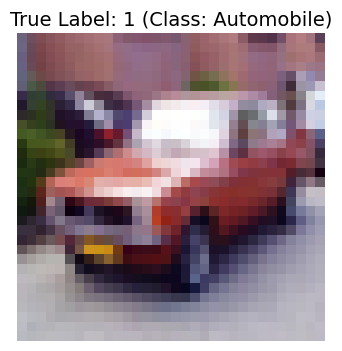

In [45]:
# Randomly select an image from the test dataset
import random

test_image_index3 = random.randint(0, len(X_test) - 1)
test_image3 = X_test[test_image_index3]
true_label3 = np.argmax(y_cat_test[test_image_index3])

plt.figure(figsize=(4, 4))
plt.imshow(test_image3)
plt.title(f"True Label: {true_label3} (Class: {labels[true_label3]})", fontsize=14)
plt.axis('off')
plt.show()


In [47]:
processed_image3 = test_image3.reshape(1, 32, 32, 3)

prediction3 = model.predict(processed_image3)
predicted_label3 = np.argmax(prediction3, axis=1)[0]
print(f"True Label: {true_label3} (Class: {labels[true_label3]})")
print(f"Predicted Label: {predicted_label3} (Class: {labels[predicted_label3]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
True Label: 1 (Class: Automobile)
Predicted Label: 1 (Class: Automobile)
